# NLP Assignment 5 — Structured Notebook

In [22]:
project_title = "Sentiment Analysis of Product Reviews"
project_summary = "End-to-end pipeline: preprocessing, vectorization, classical ML + transformer, evaluation, and report."
print(project_title)
print(project_summary)

Sentiment Analysis of Product Reviews
End-to-end pipeline: preprocessing, vectorization, classical ML + transformer, evaluation, and report.


### Imports & Environment Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

### Data Loading

In [4]:
train = pd.read_csv("/content/drive/MyDrive/twitter_training.csv")
valid = pd.read_csv("/content/drive/MyDrive/twitter_validation.csv")

In [5]:
print(train.head())
print(valid.head())

   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     
   3364   Facebook Irrelevant  \
0   352     Amazon    Neutral   
1  8312  Microsoft   Negative   
2  4371      CS-GO   Negative   
3  4433     Google    Neutral   
4  6273       FIFA   Negative   

  I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣  
0

### Renaming Columns
- Standardizes column names  
- Changes **tweet → text**  
- Applies to both `train` and `valid` datasets


In [6]:
# Dataset format: [id, entity, sentiment, tweet]
train.columns = ["id", "entity", "sentiment", "text"]
valid.columns = ["id", "entity", "sentiment", "text"]

In [7]:
print(train.head())
print(valid.head())

     id       entity sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                text  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...  
     id     entity sentiment  \
0   352     Amazon   Neutral   
1  8312  Microsoft  Negative   
2  4371      CS-GO  Negative   
3  4433     Google   Neutral   
4  6273       FIFA  Negative   

                                                text  
0  BBC News - Amazon boss Jeff Bezos rejects clai...  
1  @Microsoft Why do I pay for WORD when it funct...  
2  CSGO matchmaking is so full of closet hacking,...  
3  Now the President is slapping Americans in the...

### Selecting Required Columns
- Keep only **text** and **sentiment**
- Removes unused columns from `train` and `valid`


In [8]:
# Keep only required columns
train = train[["text", "sentiment"]]
valid = valid[["text", "sentiment"]]

In [9]:
print(train.head())
print(valid.head())

                                                text sentiment
0  I am coming to the borders and I will kill you...  Positive
1  im getting on borderlands and i will kill you ...  Positive
2  im coming on borderlands and i will murder you...  Positive
3  im getting on borderlands 2 and i will murder ...  Positive
4  im getting into borderlands and i can murder y...  Positive
                                                text sentiment
0  BBC News - Amazon boss Jeff Bezos rejects clai...   Neutral
1  @Microsoft Why do I pay for WORD when it funct...  Negative
2  CSGO matchmaking is so full of closet hacking,...  Negative
3  Now the President is slapping Americans in the...   Neutral
4  Hi @EAHelp I’ve had Madeleine McCann in my cel...  Negative


### Checking Sentiment Categories
- Display all unique sentiment labels present in the training data


In [10]:
train["sentiment"].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

### Mapping Sentiments
- Convert 4 sentiment types into **3 main classes**
- Map **Irrelevant → Neutral**
- Apply mapping to both `train` and `valid`


In [11]:
# Map sentiments into 3 classes
sentiment_map = {"Positive": "Positive", "Negative": "Negative",
                 "Neutral": "Neutral", "Irrelevant": "Neutral"}
train["sentiment"] = train["sentiment"].map(sentiment_map)
valid["sentiment"] = valid["sentiment"].map(sentiment_map)

In [12]:
print("Training data shape:", train.shape)
print("Validation data shape:", valid.shape)

Training data shape: (74681, 2)
Validation data shape: (999, 2)


### Removing Missing Text
- Drop rows where **text** is empty or NaN  
- Clean both `train` and `valid` datasets


In [13]:
train = train.dropna(subset=["text"])
valid = valid.dropna(subset=["text"])

### Initialize TF-IDF Vectorizer
- Use English stopwords  
- Limit to **10,000** features


In [14]:
tfidf = TfidfVectorizer(stop_words="english", max_features=10000)

### Transform Text into Vectors
- Fit TF-IDF on training text  
- Transform both train & validation text  
- Prepare `X_train`, `X_valid`, `y_train`, `y_valid`


In [15]:
X_train = tfidf.fit_transform(train["text"])
y_train = train["sentiment"]

In [16]:
X_valid = tfidf.transform(valid["text"])
y_valid = valid["sentiment"]

### Define Models
- Create a dictionary of ML models  
- Includes Logistic Regression, Linear SVC, Naive Bayes, Random Forest


In [17]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=300, random_state=42),
    "Linear SVC": LinearSVC(random_state=42),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
}

In [18]:
results = []

### Train & Evaluate Models
- Loop through all defined models  
- Train on TF-IDF vectors  
- Print accuracy and classification report  
- Plot confusion matrix for each model  
- Store results for comparison


Training Logistic Regression...
Logistic Regression Accuracy: 0.8789

Classification Report:
              precision    recall  f1-score   support

    Negative       0.86      0.91      0.88       266
     Neutral       0.90      0.87      0.89       456
    Positive       0.87      0.86      0.87       277

    accuracy                           0.88       999
   macro avg       0.88      0.88      0.88       999
weighted avg       0.88      0.88      0.88       999



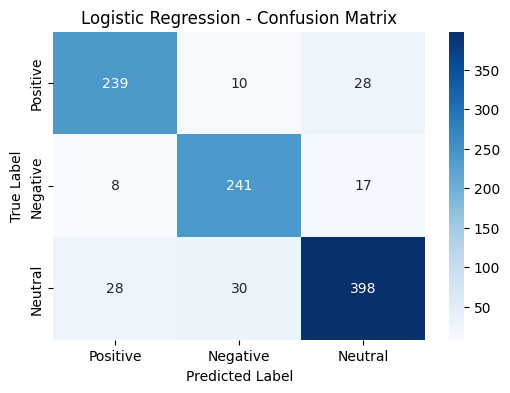

Training Linear SVC...
Linear SVC Accuracy: 0.9129

Classification Report:
              precision    recall  f1-score   support

    Negative       0.89      0.92      0.91       266
     Neutral       0.93      0.92      0.92       456
    Positive       0.91      0.90      0.90       277

    accuracy                           0.91       999
   macro avg       0.91      0.91      0.91       999
weighted avg       0.91      0.91      0.91       999



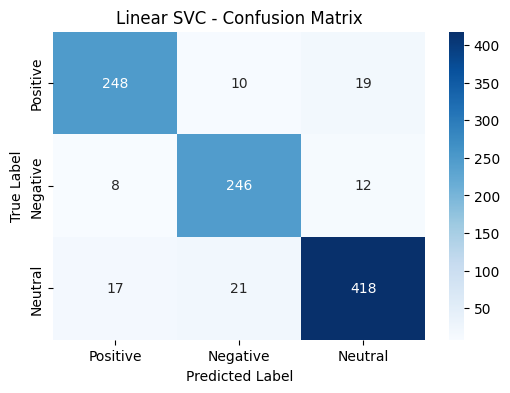

Training Naive Bayes...
Naive Bayes Accuracy: 0.8028

Classification Report:
              precision    recall  f1-score   support

    Negative       0.76      0.80      0.78       266
     Neutral       0.84      0.80      0.82       456
    Positive       0.79      0.80      0.80       277

    accuracy                           0.80       999
   macro avg       0.80      0.80      0.80       999
weighted avg       0.80      0.80      0.80       999



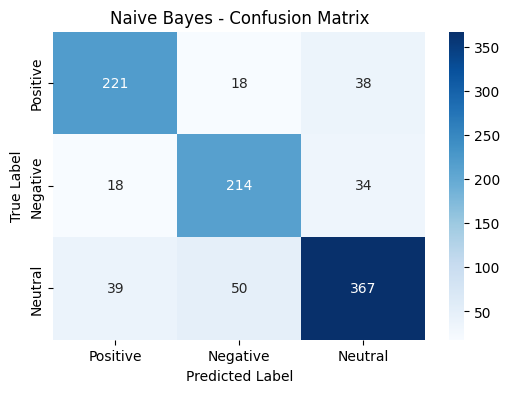

Training Random Forest...
Random Forest Accuracy: 0.9489

Classification Report:
              precision    recall  f1-score   support

    Negative       0.97      0.95      0.96       266
     Neutral       0.92      0.97      0.95       456
    Positive       0.98      0.91      0.94       277

    accuracy                           0.95       999
   macro avg       0.96      0.94      0.95       999
weighted avg       0.95      0.95      0.95       999



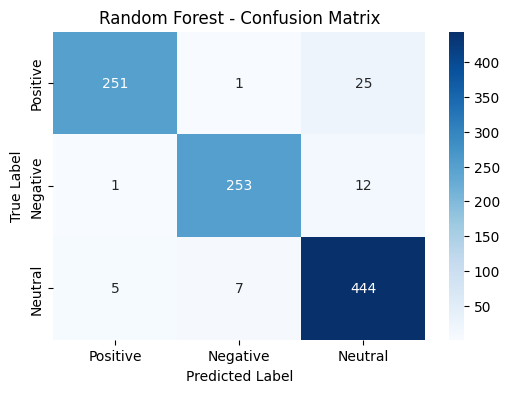

In [19]:
for name, model in models.items():
    print("="*40)
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)

    acc = accuracy_score(y_valid, preds)
    print(f"{name} Accuracy: {acc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_valid, preds))


# Confusion matrix
    cm = confusion_matrix(y_valid, preds, labels=["Positive", "Negative", "Neutral"])
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Positive", "Negative", "Neutral"],
                yticklabels=["Positive", "Negative", "Neutral"])
    plt.title(f"{name} - Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

    results.append((name, acc))

### Compare Model Performance
- Create a results DataFrame  
- Sort models by accuracy  
- Print final comparison table


In [20]:
results_df = pd.DataFrame(results, columns=["Model", "Accuracy"]).sort_values(by="Accuracy", ascending=False)
print("\n\n===== Model Comparison Results =====")
print(results_df)




===== Model Comparison Results =====
                 Model  Accuracy
3        Random Forest  0.948949
1           Linear SVC  0.912913
0  Logistic Regression  0.878879
2          Naive Bayes  0.802803


### Visualize Model Accuracies
- Bar plot of accuracy scores  
- Compare performance across all models


/tmp/ipython-input-1890838408.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Accuracy", y="Model", palette="viridis")


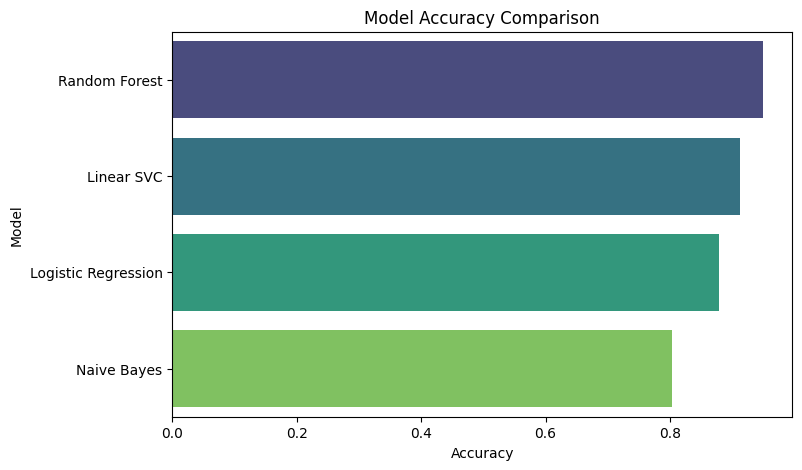

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(data=results_df, x="Accuracy", y="Model", palette="viridis")
plt.title("Model Accuracy Comparison")
plt.show()


### 📌 Final Conclusion
- **Random Forest** achieved the highest accuracy (**94.89%**) and performs best overall.  
- **Linear SVC** shows strong and stable performance (**91.29%**), making it a reliable alternative.  
- **Logistic Regression** gives moderate results (**87.88%**) and works well for baseline comparison.  
- **Naive Bayes** performs the lowest (**80.28%**), likely due to its simplicity and assumptions.

**Overall:** Random Forest is the most effective model for this sentiment classification task based on accuracy and evaluation metrics.
